# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 2
# Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

/Users/pmw/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Predicting Taxi Pickups in NYC

In this homework, we will explore k-nearest neighbor, linear and polynomial regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in files `dataset_1_train.txt` and `dataset_1_test.txt` as separate training and test sets. The first column in each file contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded during different days in Jan 2015 (randomly sampled across days and time of that day).

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pick ups at that time. The models will be fitted to the training set, and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric. 

**Data Normalization:** As a first step, we suggest that you normalize the `TimeMin` predictor to a value between 0 and 1. This can be done by dividing the time column in the training and test sets by 1440 (i.e. the maximum value the predictor can take). This normalization step would be particularly helpful while fitting polynomial regression models on this data.

# Part (0): EDA

Generate a scatter plot of the training data points, with the time of the day on the X-axis and the number of taxi pickups on the Y-axis. Does the pattern of taxi pickups make intuitive sense to you?

In [2]:
train_df = pd.read_csv('/Users/pmw/Documents/Harvard/CS109/data/dataset1_train.csv')
test_df = pd.read_csv('/Users/pmw/Documents/Harvard/CS109/data/dataset1_test.csv')

norm_min = lambda min: np.divide(min, 1440)

train_df['TimeMinNorm'] = norm_min(train_df.TimeMin)
test_df['TimeMinNorm'] = norm_min(test_df.TimeMin)

train_df = train_df.sort_values('TimeMinNorm')
test_df = test_df.sort_values('TimeMinNorm')

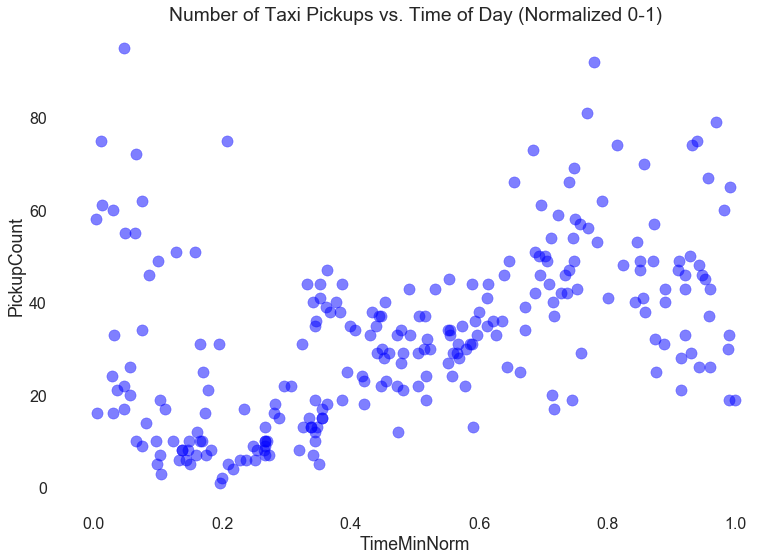

In [3]:
import seaborn as sns

with sns.plotting_context('poster'):
    sns.axes_style('whitegrid');
    ax = plt.gca();
    plt.scatter(train_df.TimeMinNorm, train_df.PickupCount, c='b', alpha=.5);
    plt.ylabel('PickupCount');
    plt.xlabel('TimeMinNorm');
    plt.title('Number of Taxi Pickups vs. Time of Day (Normalized 0-1)');
    plt.grid(axis='both', color='white', linestyle='-');
    ax.tick_params(axis='both', which='both', length=0);
    ax.set_facecolor('white')

It is observed that in the early hours of the morning (12AM - 3AM) and the late evening into the nighttime hours (6PM-12PM) the city experiences higher levels of taxi pickups. Past about 4AM, PickupCount seems to have a linear relationship with the time of day in minutes. 

The fact that the late evening and early morning sees higher levels of taxi pickups makes intuitive sense because these are busier hours for bars and night life, meaning more people are under the influence of alcohol and are needing rides from taxis to avoid car accidents or DUI arrests. This intuition is furthered by the observation that from midnight to about 4AM the number of taxi pickups appears to decrease. There appears to be a considerable outlier of elevated pickups around 4AM, however it would be prudent to investigate which date this observation was taken to ensure that this date was not New Years Day. 

The linear relationship with the time of day and number of pickups has some intuition as well. New York is a large tourist destination and a hub of commerce. Many people like to stick near home, hotel or the office in the mornings, then run errands in the afternoon and evening. This intuition, however, has no basis in the observed data and needs further exploration.

# Part (a): k-Nearest Neighbors

We begin with k-Nearest Neighbors (k-NN), a non-parametric regression technique. You may use `sklearn`'s built-in functions to run k-NN regression. Create a `KNeighborsRegressor` object, use the `fit` method in the object to fit a k-NN regressor model, use the `predict` method to make predictions from the model, and the `score` method to evaluate the $R^2$ score of the model on a data set.

- Fit k-NN regression models:
    - Fit a k-NN regression model to the training set for different values of $k$ (e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200). 
    - If you are using `sklearn`'s built-in functions for k-NN regression, explain what happens when you invoke the `fit` function. 
    - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
- Visualize the fitted models: 
    - Generate a scatter plot of the training data points, and in the same figure, also generate line plots of the predicted values $\hat{y}$ from each fitted model as a function of the predictor variable $x$. (*Hint:* you will want to sort the $x$ values before plotting.)
    - How does the value of $k$ effect the fitted model?
- Evaluate the fitted models:
    - Compute the $R^2$ score for the fitted models on both the training and test sets. Are some of the calculated $R^2$ values negative? If so, what does this indicate? What does a $R^2$ score of 0 mean?
    - Make plots of the training and test $R^2$ values as a function of $k$. Do the training and test $R^2$ plots exhibit different trends? Explain how the value of $k$ influences the training and test $R^2$ values.

KNN @ k = 1
Algorithm took 0.46 ms
Training R-squared = 0.8790
Testing R-squared = -0.2321
Training MSE = 43.10
Testing MSE = 358.41

KNN @ k = 2
Algorithm took 0.26 ms
Training R-squared = 0.6468
Testing R-squared = 0.1406
Training MSE = 125.79
Testing MSE = 281.58

KNN @ k = 4
Algorithm took 0.33 ms
Training R-squared = 0.5231
Testing R-squared = 0.3513
Training MSE = 169.87
Testing MSE = 232.66

KNN @ k = 8
Algorithm took 0.25 ms
Training R-squared = 0.4682
Testing R-squared = 0.4580
Training MSE = 189.40
Testing MSE = 222.75

KNN @ k = 16
Algorithm took 0.25 ms
Training R-squared = 0.4359
Testing R-squared = 0.4959
Training MSE = 200.90
Testing MSE = 214.32

KNN @ k = 32
Algorithm took 0.49 ms
Training R-squared = 0.4022
Testing R-squared = 0.4816
Training MSE = 212.90
Testing MSE = 216.61

KNN @ k = 64
Algorithm took 0.34 ms
Training R-squared = 0.3237
Testing R-squared = 0.4226
Training MSE = 240.88
Testing MSE = 235.84

KNN @ k = 128
Algorithm took 0.14 ms
Training R-squared = 0

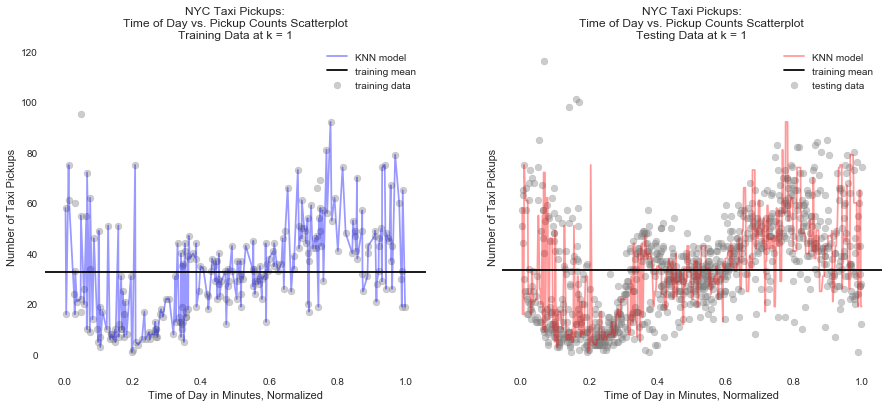

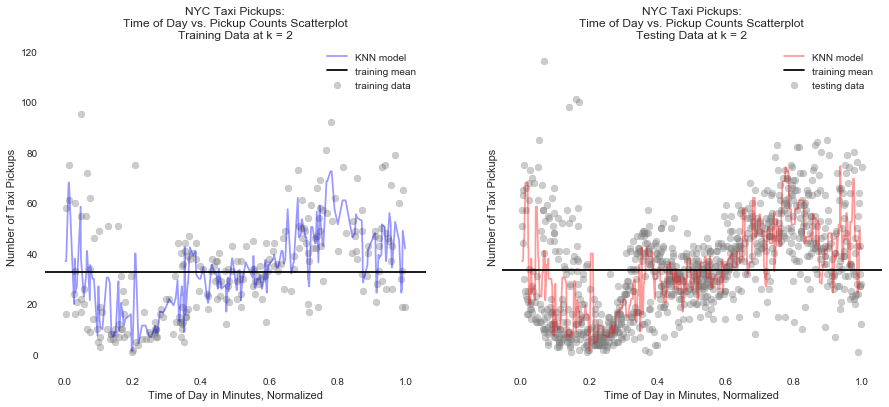

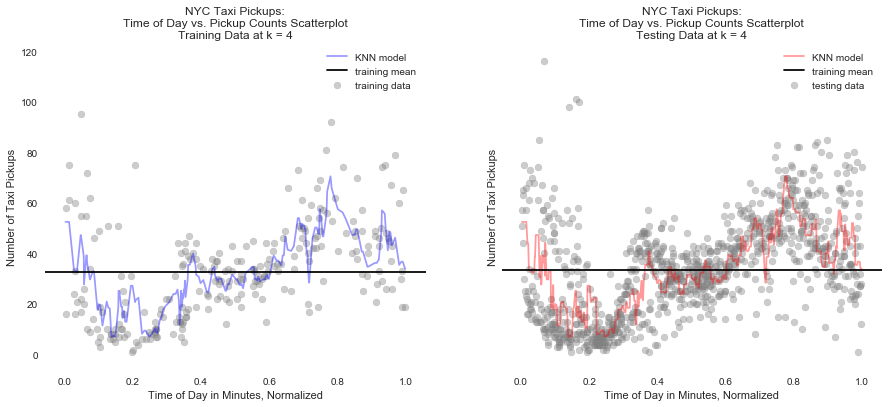

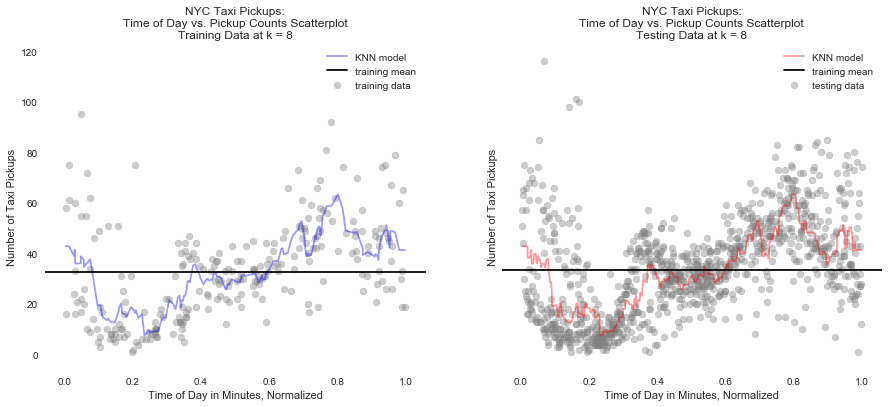

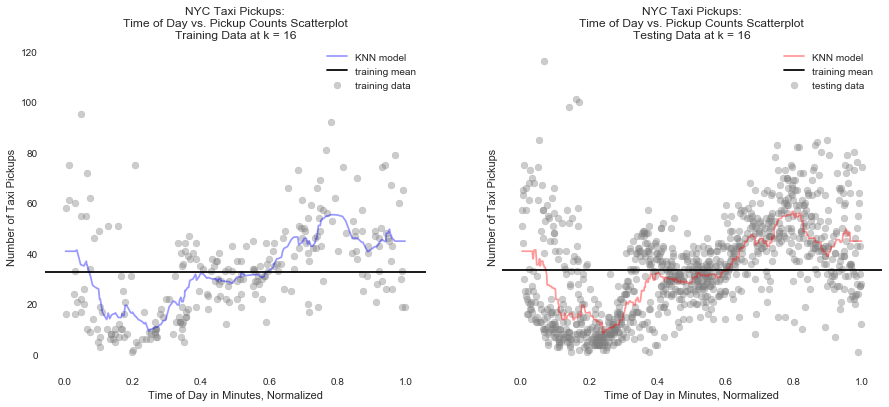

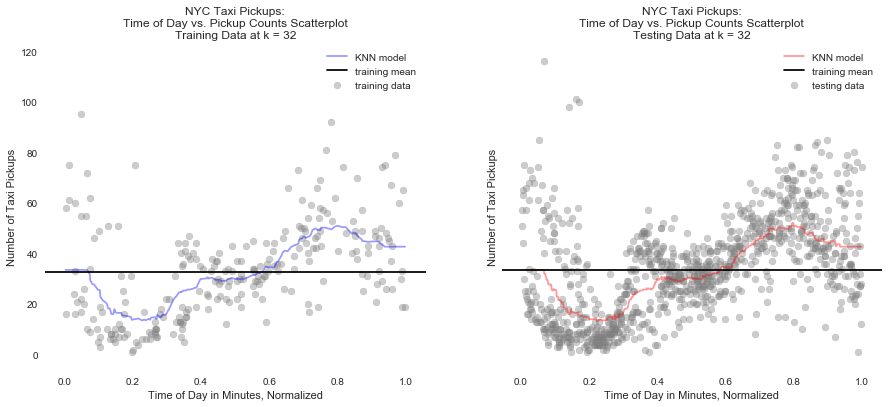

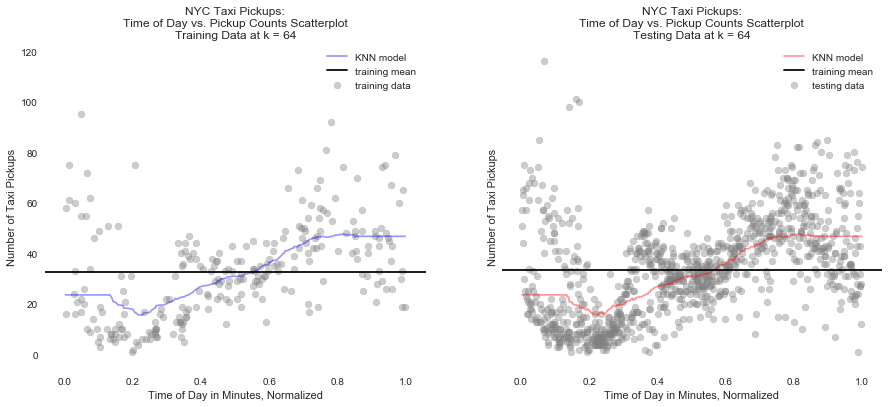

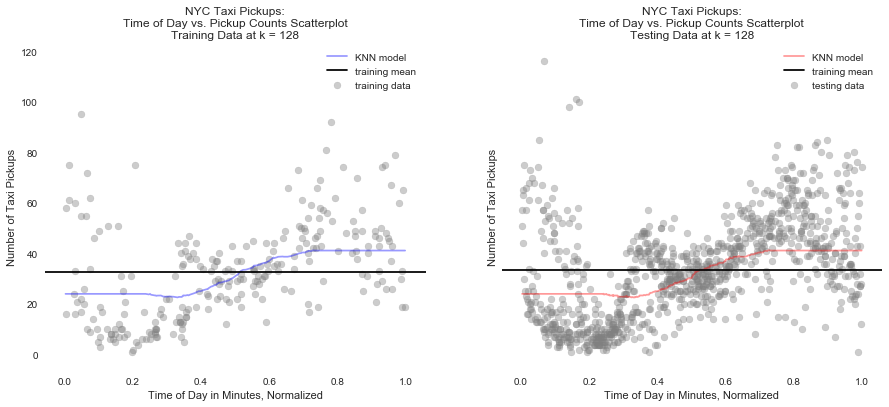

In [4]:
import time

def reshape_X_Y(X, Y):
    x_shape0, y_shape0 = X.shape, Y.shape
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)
    x_shape1, y_shape1 = X.shape, Y.shape
    return X, Y

MSE = lambda x, y, mod: np.mean(abs(y - mod.predict(x))**2)

def coeficient_determination(x, y, k):
    mod = KNeighborsRegressor(n_neighbors=k)
    mod.fit(x, y)
    return mod.score(x, y)

def plot_knn(X, Y, knn_model, fig, ax, training, k):
    if training: 
        label = 'training data'
        color = 'blue'
        title = 'NYC Taxi Pickups:\nTime of Day vs. Pickup Counts Scatterplot\nTraining Data at k = '+str(k)
    else: 
        label = 'testing data'
        color = 'red'
        title = 'NYC Taxi Pickups:\nTime of Day vs. Pickup Counts Scatterplot\nTesting Data at k = '+str(k)
        
    ax.scatter(X, Y, c='gray', alpha=0.4, label=label);
    ax.plot(np.sort(X), knn_model.predict(np.sort(X)), c=color, alpha=0.4, label='KNN model');
    ax.set_xlabel('Time of Day in Minutes, Normalized');
    ax.set_ylabel('Number of Taxi Pickups');
    ax.set_title(title);
    ax.tick_params(axis='both', which='both', length=0);
    ax.set_facecolor('white');
    ax.axhline(np.mean(Y), c='black', label='training mean');
    ax.legend(loc='best');

X, Y = train_df.TimeMinNorm.values, train_df.PickupCount.values
X, Y = reshape_X_Y(X, Y)

X_test, Y_test = test_df.TimeMinNorm.values, test_df.PickupCount.values
X_test, Y_test = reshape_X_Y(X_test, Y_test)

k_values = np.array([1, 2, 4, 8, 16, 32, 64, 128])

r_sq, r_sq_ts, ms = [], [], []
for k in k_values:
    t0 = time.time()
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X, Y)
    t1 = time.time()
    milliseconds = (t1 - t0)*1000
    ms.append(milliseconds)
    
    r_squared = knn_model.score(X, Y)
    r_squared_test = coeficient_determination(Y_test, knn_model.predict(X_test), k)
    r_sq.append(r_squared)
    r_sq_ts.append(r_squared_test)
    print('KNN @ k = %i\nAlgorithm took %.2f ms' %(k, milliseconds))
    print('Training R-squared = %.4f' %r_squared)
    print('Testing R-squared = %.4f' %r_squared_test)
    mse_train, mse_test = MSE(X, Y, knn_model), MSE(X_test, Y_test, knn_model)
    
    print('Training MSE = %.2f\nTesting MSE = %.2f\n' %(mse_train, mse_test))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6), sharey=True)
    plot_knn(X, Y, knn_model, fig, ax1, training=True, k=k)
    plot_knn(X_test, Y_test, knn_model, fig, ax2, training=False, k=k)

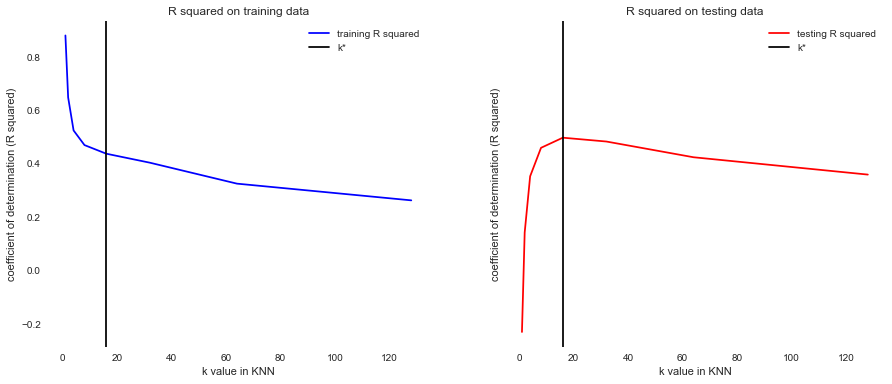

In [5]:
data = {'k':k_values, 'r_squared_train':r_sq, 'r_squared_test':r_sq_ts, 'run_time':ms}
df = pd.DataFrame(data)
k_at_max_r = df.loc[df.r_squared_test == df.r_squared_test.max(), 'k'].values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6), sharey=True);
ax1.plot(df.k, df.r_squared_train, c='blue', label='training R squared');
ax1.set_ylabel('coefficient of determination (R squared)');
ax1.set_xlabel('k value in KNN');
ax1.tick_params(axis='both', which='both', length=0);
ax1.set_facecolor('white');
ax1.axvline(k_at_max_r, c='black', label='k*');
ax1.legend(loc='best');
ax1.set_title('R squared on training data')

ax2.plot(df.k, df.r_squared_test, c='red', label='testing R squared');
ax2.set_ylabel('coefficient of determination (R squared)');
ax2.set_xlabel('k value in KNN');
ax2.tick_params(axis='both', which='both', length=0);
ax2.set_facecolor('white');
ax2.axvline(k_at_max_r, c='black', label='k*');
ax2.legend(loc='best');
ax2.set_title('R squared on testing data')

### KNN Regression Interpretation

When `sklearn`'s KNN regressor is fit at a given K value, the algorithm takes the feature set X (in this case Time of Day) and associates them with the the average Y label of the K nearest observed (X, Y) coordinate labels (as measured by euclidean distance in n-dimensional space). Each point is treated equally if the `weights` parameter is set to `'uniform'`, which is the `KNeighborsRegressor`'s default setting. It is possible to change this parameter to `weights = 'distance'` in order to assign weights proportional to the inverse of the distance from the query point. 

When K is small, a given KNN model is considerably more volatile in its predictions because it is only averaging a small number of Y neighbors for a given X value. Risk of over-fitting is higher at lower K values. When K is larger, a given KNN model is much more subdued. As K approaches N, where N is the number of samples in the training data, the predicted values approach and converge on the average value of the Y label in the training data.

It is observed that for low values of $k$ that the $R^2$ is slightly negative. This means that models fit at these low values do a worse job of predicting than simply guessing the mean value every time, which would have an $R^2 = 0$. The maximum $R^2$ value is observed at $k = 16$, where the test $R^2 = 0.4959$. It is interesting to note the different trends between the training and testing datasets as exhibited by their $R^2$ values. This pattern is expected because at low values of $k$ we are over-fitting our model to the training set. This is further evidenced by the poor performance of these same models on the test data. It is shown above that the training $R^2$ decreases as a function of $k$, while the test $R^2$ is concave as a function of $k$. This convenient feature helps us to find the max training $R^2$ at $k = 16$.

# Part (b): Simple Linear Regression

We next consider parametric approaches for regression, starting with simple linear regression, which assumes that the response variable has a linear relationship with the predictor. Do you see any advantages in using a parametric regression model over k-NN regression?

We suggest that you use the `statsmodels` module for linear regression. This module has built-in functions to summarize the results of regression, and to compute confidence intervals for estimated regression parameters. Create a `OLS` class instance, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. To include an intercept term in the regression model, you will need to append a column of 1's to the array of predictors using the `sm.add_constant` method. The `fit` method returns a `results` instance. Use the  `results.summary` method to obtain a summary of the regression fit, the `results.params` attribute to get the estimated regression parameters, and the `conf_int` method to compute confidence intervals for the estimated parameters. You may use the `r2_score` function to compute $R^2$.

Using the suggested built-in functions, answer the following questions:

- Fit a linear regression model to the training set, and evaluate its $R^2$ value on both the training and test sets (you may notice something peculiar about how they compare). 
- How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression in Part (a)?

- Compute confidence intervals:
    - Print the slope and intercept values for the fitted linear model. What does the sign of the slope convey about the data?
    - Compute the 95% confidence interval for the slope and intercept. Based on this information, do you consider the estimates of the model parameters to be reliable?
    - Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence intervals? Briefly explain your answer.

- Analyze residual plots:
    - Make a plot of the residuals ${e} = y - \hat{y}$ of the model on the training set as a function of the predictor variable $x$ (i.e. time of day). Draw a horizontal line denoting the zero residual value on the Y-axis.
    - Using this residual plot, comment on whether the assumption of linearity is valid for this data.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     64.82
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           3.43e-14
Time:                        20:50:32   Log-Likelihood:                -1060.1
No. Observations:                 250   AIC:                             2124.
Df Residuals:                     248   BIC:                             2131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0264      2.121      8.501      0.0

/Users/pmw/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


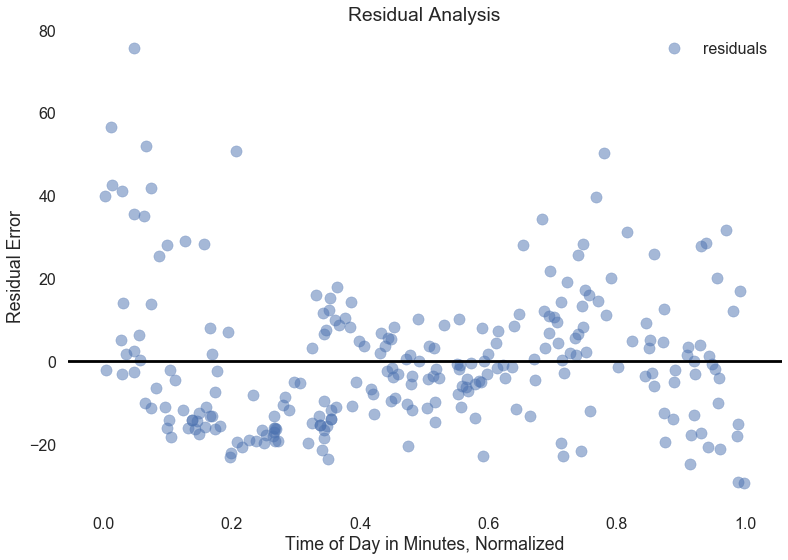

In [6]:
## OLS
def sm_linear_regression(Y, X, intercept=True):
    if intercept: X = sm.add_constant(X)
    lin_model = sm.OLS(Y, X)
    lin_model_results = lin_model.fit()
    print(lin_model_results.summary())
    return lin_model_results

def sm_linear_prediction(X_test, ols_results, intercept=True):
    if intercept: X_test = sm.add_constant(X_test)
    Y_hat = ols_results.predict(X_test)
    return Y_hat

ols_results = sm_linear_regression(Y, X)
Y_predict = sm_linear_prediction(X_test, ols_results)
r2_test = r2_score(Y_test, Y_predict)
r2_train = r2_score(Y, sm_linear_prediction(X, ols_results))
print('\nR-squared training = %5f\nR-squared testing = %5f\n' %(r2_train, r2_test))

B0, B1 = ols_results.params[0], ols_results.params[1]
print('Intercept = %.4f\nSlope = %.4f\n' %(B0, B1))

def show_confidence_intervals(ols_results, level):
    B0_confint_low, B0_confint_hi = ols_results.conf_int(level)[0]
    B1_confint_low, B1_confint_hi = ols_results.conf_int(level)[1]
    
    level = 1 - level
    print('Intercept lower confidence at %.2f = %.4f\nIntercept upper confidence at %.2f = %.4f\n' \
          %(level, B0_confint_low, level, B0_confint_hi))
    print('Slope lower confidence at %.2f = %.4f\nSlope upper confidence at %.2f = %.4f\n' \
          %(level, B1_confint_low, level, B1_confint_hi))
    return None

show_confidence_intervals(ols_results, .05)
show_confidence_intervals(ols_results, .01)

with sns.plotting_context('poster'):
    ax = plt.subplot(111, axisbg='white');
    plt.scatter(X, ols_results.resid, alpha=.5, label='residuals');
    plt.axhline(0, c='black');
    plt.xlabel('Time of Day in Minutes, Normalized');
    plt.ylabel('Residual Error');
    plt.title('Residual Analysis');
    plt.tick_params(axis='both', which='both', length=0);
    plt.legend(loc='best');

### Advantages of Parameterized Models

A clear advantage to using paramaterized models is interpretability. Whereas non-paramaterized models may (sometimes) have greater predictive capabilities, they are often not easy to interpret through the context of scholarly knowledge of the subject being studied. 

### Simple Linear Regression $R^2$

It is interesting to note that the testing $R^2 = 0.248$, which is a bit higher than the training $R^2 = .207$. The best test $R^2$ for the `KNeighborsRegressor` model came in at $0.4959$, considerably better than the `OLS` regression model's test $R^2 = 0.248$.

### Confidence Intervals

The fitted `OLS` returns a $B_0 = 18.0264$ and a $B_1 = 30.2890$. 

At a $95 \%$ confidence interval $B_0$ ranges between $\pm (13.85, 22.20)$, while at a $99 \%$ confidence interval $B_0$ ranges between $\pm (12.52, 23.52)$.

At a $95 \%$ confidence interval $B_1$ ranges between $\pm (22.88, 37.70)$, while at a $99 \%$ confidence interval $B_1$ ranges between $\pm (20.52, 40.05)$.

These confidence intervals, especially around the slope coefficient, are considerably wide. While it is expected that the $99\%$ confidence interval is wider than teh $95\%$ interval, it is not encouraging to see such a considerable widening. This indicates that a simple linear model is not appropriate for the dataset.

### Residual Plot Analysis

The residual plot exhibits signs of autocorrelation, adding to the evidence that the assumption of linearity on this dataset is not valid. Furthermore, even without plotting a histogram it can be seen from the residual plot that the errors under this model are likely not normally distributed. 

### Simple Linear Model Interpretation

The simple linear model does not appear appropriate for this dataset. Polynomial Regression will be explored as another viable alternative below.

# Part (c): Polynomial Regression

We proceed to higher-order polynomial models for regression:

- By visual inspection, what polynomial degree do you think would provide the best fit for the data?

#### Visual Inspection

It appears upon visual inspection of the scatterplot that a third degree polynomial may be appropriate for this data. This is evident by the (apparent) local minimum on the left side of the plot and the (apparent) local maximum at the right.

- At the start of this assignment, we had advised you to normalize the time predictor in the training and test sets to a value in [0,1], and noted that this would be helpful in fitting polynomial regression models. Had the time predictor not been normalized, what difficulties in implementing polynomial regression may have occurred?

- Fit polynomial regression models of degrees 2, 3, 10, 25 and 50 to the training set, and generate visualizations of the fitted models (in the same figure, plot the predicted value from all models as a function of time). 

- Evaluate the $R^2$ value of the fitted models on both the training and test sets. Does a high training $R^2$ value necessarily indicate a high test $R^2$ value? How do the test $R^2$ values from the different polynomial models compare with the test $R^2$ from simple linear regression in Part (b), and the best test $R^2$ from k-NN regression in Part (a)?

- Generate residual plots for the different polynomial regression models (plot of residuals on training set vs. time). How does the increase in polynomial degree effect the residual plots?

*Hint:* You may use the `PolynomialFeatures` class to include polynomial terms in the regression model.

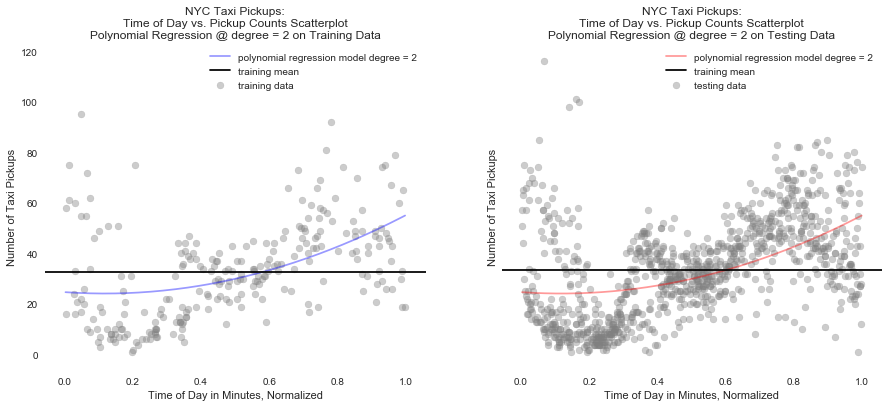

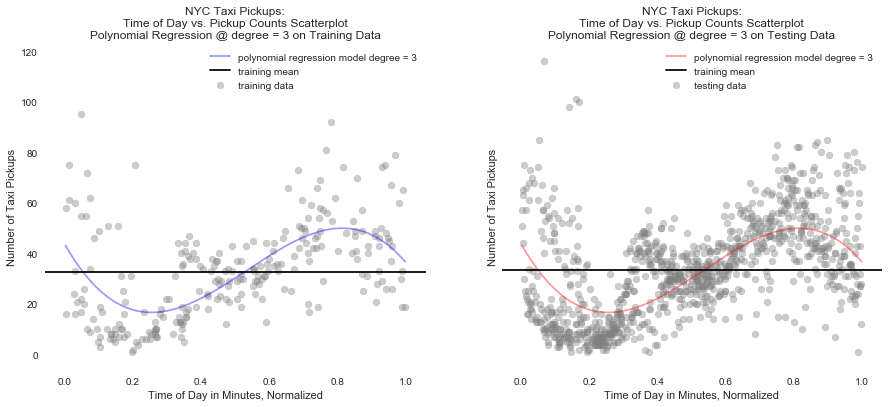

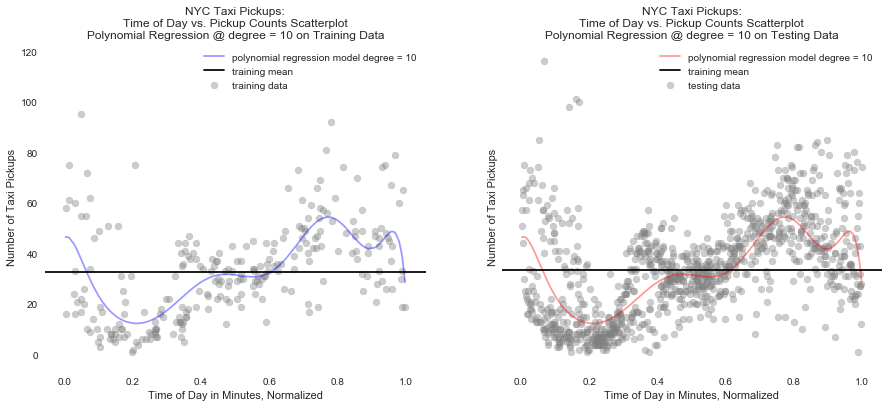

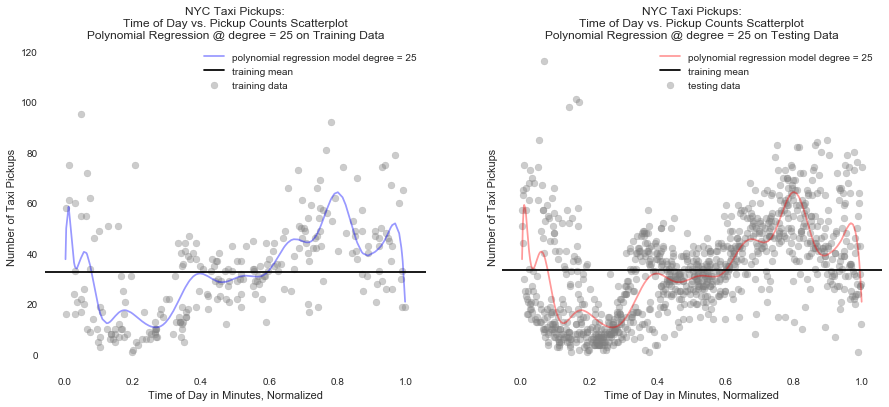

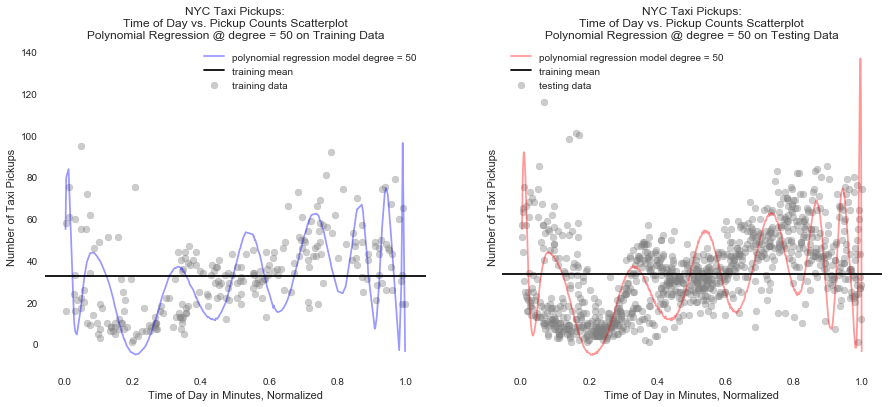

In [7]:
from sklearn.linear_model import LinearRegression

def derive_polynomials(X, degree, *args):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    return X_poly

def skl_linear_regression(X, Y, intercept=True, degree=1):
    lin_model = LinearRegression(fit_intercept=intercept)
    lin_model.fit(X, Y)
    r2 = lin_model.score(X, Y)
    return lin_model, r2

degrees = [2, 3, 10, 25, 50]
r2_training, r2_testing = [], []
df_train = pd.DataFrame(index=np.arange(0, len(Y)))
df_test = pd.DataFrame(index=np.arange(0, len(Y_test)))

def plot_polynomial(X, Y, Y_hat, poly_model, fig, ax, training, degree):
    if training: 
        label = 'training data'
        color = 'blue'
        title = 'NYC Taxi Pickups:\nTime of Day vs. Pickup Counts Scatterplot\nPolynomial Regression @ degree = '  + str(degree) + ' on Training Data'
    else: 
        label = 'testing data'
        color = 'red'
        title = 'NYC Taxi Pickups:\nTime of Day vs. Pickup Counts Scatterplot\nPolynomial Regression @ degree = '  + str(degree) + ' on Testing Data'
        
    ax.scatter(X, Y, c='gray', alpha=0.4, label=label);
    ax.plot(X, Y_hat, c=color, alpha=0.4, label='polynomial regression model degree = ' + str(degree));
    ax.set_xlabel('Time of Day in Minutes, Normalized');
    ax.set_ylabel('Number of Taxi Pickups');
    ax.set_title(title);
    ax.tick_params(axis='both', which='both', length=0);
    ax.set_facecolor('white');
    ax.axhline(np.mean(Y), c='black', label='training mean');
    ax.legend(loc='best');

for i, degree in enumerate(degrees):
    X_poly_train = derive_polynomials(X, degree=degree)
    poly_lin_mod, r2_train = skl_linear_regression(X_poly_train, Y, intercept=True, degree=degree)
    Y_hat_train = poly_lin_mod.predict(X_poly_train)
    resid_train = Y - Y_hat_train
    r2_training.append(r2_train)
    df_train = pd.concat([df_train, pd.DataFrame(resid_train)], axis=1)
    df_train = df_train.rename(columns={0:'degree_' + str(degree)})
    
    X_poly_test = derive_polynomials(X_test, degree=degree)
    poly_lin_mod_test, _ = skl_linear_regression(X_poly_test, Y_test, intercept=True, degree=degree)
    Y_hat_test = poly_lin_mod.predict(X_poly_test)
    resid_test = Y_test - Y_hat_test
    r2_testing.append(r2_score(Y_test, Y_hat_test))
    df_test = pd.concat([df_test, pd.DataFrame(resid_test)], axis=1)
    df_test = df_test.rename(columns={0:'degree_' + str(degree)})
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6), sharey=True)
    plot_polynomial(X, Y, Y_hat_train, poly_lin_mod, fig, ax1, training=True, degree=degree)
    plot_polynomial(X_test, Y_test, Y_hat_test, poly_lin_mod, fig, ax2, training=False, degree=degree)

,r_squared_testing,r_squared_training
polynomial_degree,,
2,0.255724,0.232433
3,0.378584,0.374836
10,0.402008,0.428277
25,0.394859,0.466732
50,-0.388721,-0.273231


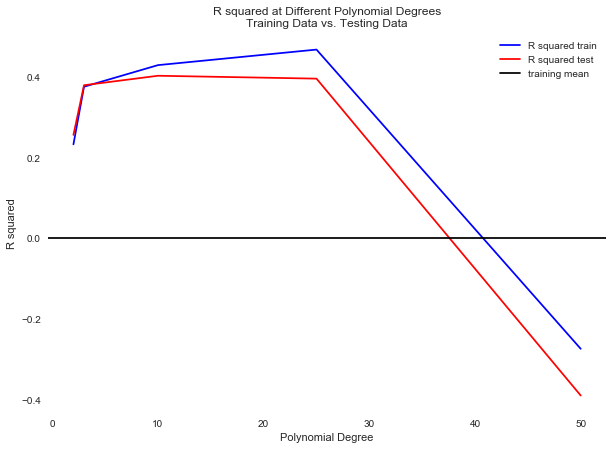

In [8]:
def residual_plots(X, resid, fig, ax, training, degree):
    if training: 
        label = 'training data'
        color = 'blue'
        title = 'NYC Taxi Pickups:\nResidual Analysis\nPolynomial Regression @ degree = '+ str(degree) + ' on Training Data'
    else: 
        label = 'testing data'
        color = 'red'
        title = 'NYC Taxi Pickups:\nResidual Analysis\nPolynomial Regression @ degree = '+ str(degree) + ' on Testing Data'
        
    ax.scatter(X, resid, c='gray', alpha=0.4, label=label);
    ax.set_xlabel('Time of Day in Minutes, Normalized');
    ax.set_ylabel('Residual Errors');
    ax.set_title(title);
    ax.tick_params(axis='both', which='both', length=0);
    ax.set_facecolor('white');
    ax.axhline(0, c='black', label='training mean');
    ax.legend(loc='best');

dat = {'r_squared_training':r2_training, 'r_squared_testing':r2_testing}
df = pd.DataFrame(dat, index=degrees)
df.index.name = 'polynomial_degree'

fig, ax = plt.subplots(1, 1, figsize=(10,7), sharey=True)
ax.plot(df.index.values, df.r_squared_training.values, c='blue', label='R squared train');
ax.plot(df.index.values, df.r_squared_testing.values, c='red', label='R squared test');
ax.set_xlabel('Polynomial Degree');
ax.set_ylabel('R squared');
ax.set_title('R squared at Different Polynomial Degrees\nTraining Data vs. Testing Data');
ax.tick_params(axis='both', which='both', length=0);
ax.set_facecolor('white');
ax.axhline(0, c='black', label='training mean');
ax.legend(loc='best');

df


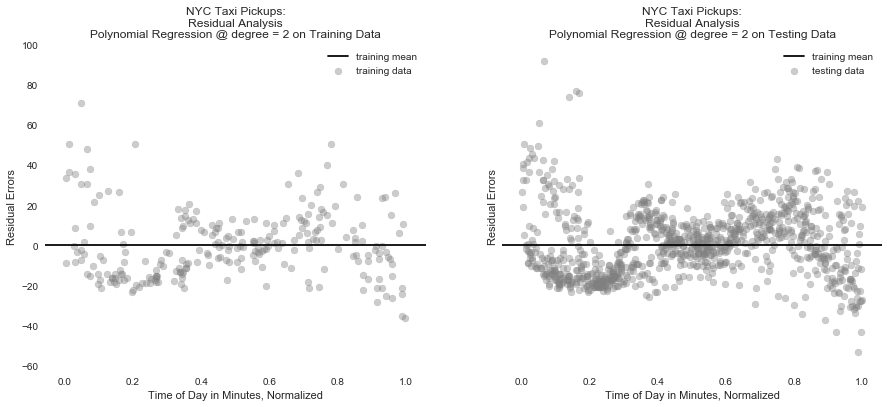

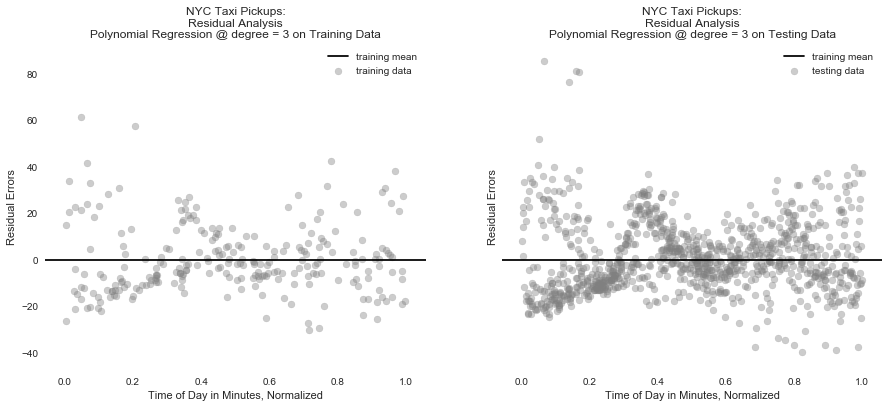

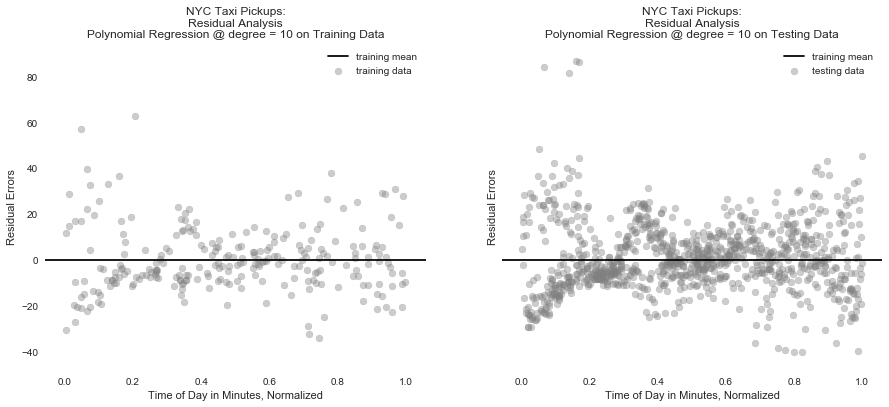

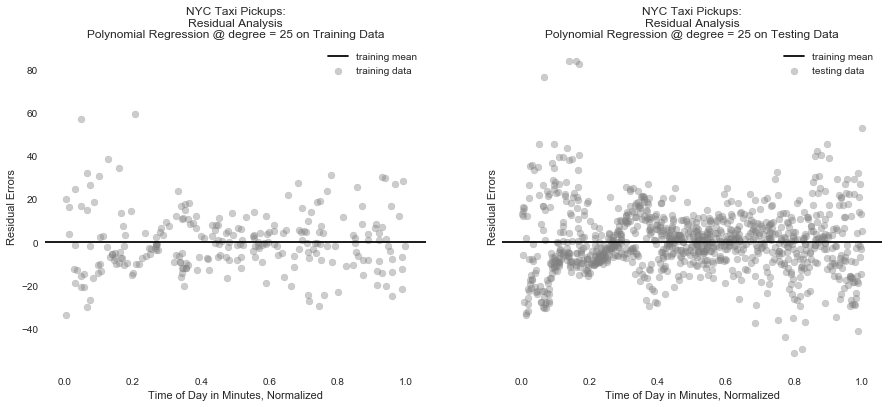

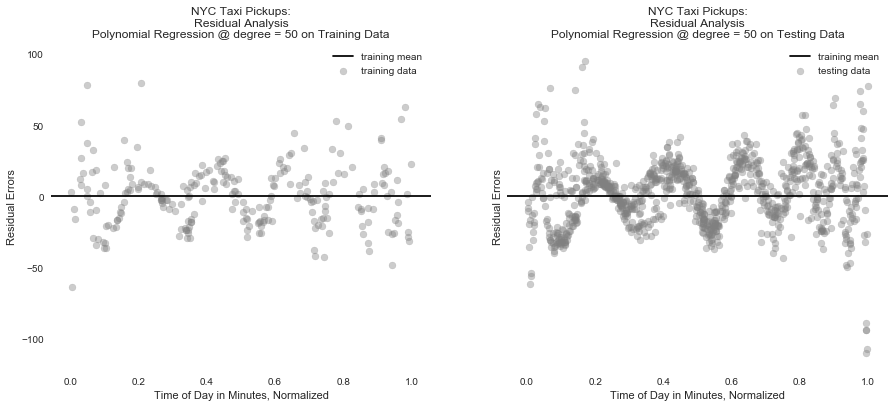

In [9]:
df_train['x_train'] = X
df_test['x_test'] = X_test

degree_cols = ['degree_'+str(d) for d in degrees]
for col, d in zip(degree_cols, degrees):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6), sharey=True)
    residual_plots(df_train.x_train, df_train[col], fig, ax1, training=True, degree=d)
    residual_plots(df_test.x_test, df_test[col], fig, ax2, training=False, degree=d)

### Normalizing the Time Variable

Normalizing the $Time$ variable between zero and one helps us attain an $X$ that has more favorable characteristics for computing the normal equations. When running a regression with high-degree polynomials, especially sequentially as is done above, the algorithms benefit from such min-max scaling.

### Polynomial Regression $R^2$

The maximum test $R^2$ is observed at degree $10$, achieving an $R^2$ of $0.4020$. This, however, is misleading. Note the initial intuition that a third degree polynomial may be appropriate due to the apparent shape exhibited by the scatterplot. When moving from a second to a third degree polynomial we observe a large jump in the $R^2$ value on the test data (from $.256$ to $0.379$). However, moving from a third degree to a ten degree yields a smaller increase (from $0.379$ to $0.402$) at the expense of all interpretability. In this instance, the maximum $R^2$ does not necessarily correspond with the best model.

### Residual Analysis 

As with the simple linear model, each of the polynomial models' residuals appear suspect. Each seems to exhibit autocorrelation, and at first glance none of them appear normal. As is expected at higher degree polynomials, there is strong autocorrelation at the degree of 50. The increase in the degree of the polynomial appears to eliminate the autocorrelation trend in the residuals up until a point (around $10$), after which the snake-like trend seems to re-emerge.

# Part (d): Summarize Results
In a brief paragraph (8 or fewer sentences), summarize which of the models seen above you would choose to predict the number of taxi cab pick-ups at any specific time of day.  Be sure to explain your choice. Interpret the model you choose, including which predictors are significant and provide and interpret the CIs for their coefficients (if you choose a regression model). How well does you model predict the number of taxi cab pick-ups?  How would you improve this model even further?  Feel free to refer to visual(s) above or provide a new one to make your case.



### Summary

It appears that the K-Nearest Neighbor algorithm does the best job of predicting the number of taxi cab pick-ups when modeled on time-of-day. Since we are not interested in understanding the underlying phenomenon of taxi pick-ups we can afford to choose a model that has little room for interpretation in exchange for more accurate predictions. We see that at $k = 16$ we achieve a respectable $R^2 = 0.4959$ - even when modeling on only one variable. This model would likely be improved by adding other features that are significantly related with the number of pick-ups. Since this dataset is from January, where the early hours of the morning on New Years Day have many inebriated individuals seeking safe passage home, one such possibility would be a dummy variable for `is_holiday`. Another possible significant predictor could be  a dummy for `is_weekend`, although this may exhibit collinearity with `is_holiday`. The possible significance of such variables is evidenced by the stratification observed on the scatterplot on the left-hand side where there is a sparse number of points that are considerably above the average, meaning more people seek taxi services in the early hours at some consistent pattern.

---- 


# APCOMP209a - Homework Question

Read Sections 1 and 2 of this [paper](https://www.researchgate.net/profile/Roberto_Togneri/publication/45094554_Linear_Regression_for_Face_Recognition/links/09e4150d243bd8b987000000/Linear-Regression-for-Face-Recognition.pdf). 

Briefly, we have a number of cleaned images of people's faces. The model leverages the concept that "patterns from a single-object class lie on a linear subspace" and the fact that linear regression can be thought of as an orthogonal projection of the response vector (Y) onto the subspace spanned by the columns of the predictor matrix (X).

### Question 1
Consider a space in $\mathbb{R}^5$, with two subspaces $S_0 \subset \mathbb{R}^5$ and $S_1 \subset \mathbb{R}^5$. For simplicity, let us consider the case where the subspace $S_0$ is spanned by the vectors $v_{00} = [1,0,0,0,0]^T$, $v_{01} =[0,1,0,0,0]^T$ and the subspace $S_1$ is spanned by the vectors $v_{10} = [0,0,0,1,0]^T$ and $v_{11} = [0,0,0,0,1]^T$. 

Now let us assume that we have a dataset that consists of labeled vectors in subspaces $S_0$ and $S_1$ respectively. Our task here is to use the data in the training dataset to classify an unknown vector into either $S_0$ or $S_1$.

Let us consider the case where we construct a predictive matrix $\mathbf{X}$ from the 'training' data for which we know the labels (note: is not meant to match $S_0$ and $S_1$ above).

```
dataset = np.array([
            [1,0,0,0,0],
            [1,1,0,0,0],
            [0,0,0,1,1],
            [0,0,0,1,0],
            ])
labels = np.array([0,0,1,1])
```

(Briefly notice that the training data probably doesn't consist of vectors that are orthonormal in spanning $S_0$ or $S_1$).

And we have an unknown vector, for which we want clasify as either a noisy example of a vector in either $S_0$ or $S_1$: ```y_0 = np.array([2,10,1,0,0])```.

In [10]:
# starter code
dataset = np.array([
            [1,0,0,0,0],
            [1,1,0,0,0],
            [0,0,0,1,1],
            [0,0,0,1,0],
            ])
labels = np.array([0,0,1,1])
y_0 = np.array([2,10,1,0,0])

#### Question 1a
Recall the solution for the Least Squares problem and the 'hat' matrix $\mathbf{H}$. Consider the case when $Y$ lies in the same subspace as the columns of $\mathbf{X}$. In this case, how accurate should the prediction of $\hat{Y}$ be?

#### Question 1b
Given the projection of $Y$ onto the space spanned by the columns of the X matrix. We can analyse the significance of the different predictor vectors (i.e. the building blocks that are used to reconstrct the $\hat{Y}$ vector). Discuss how this may help one when analysing a classification decision by the model.

#### Question 1c
As discussed in the linked paper, we have data that has vectors that are classified into one subspace or another (our training dataset). We can use the projection interpretation of linear regression to make a classification decision of a new (unseen) vector into either $S_0$ or $S_1$. In other words, construct X matrices from the known vectors, and project the unknown vector onto the subspaces spanned by the various X matrices using the "hat" interpretation of linear regression. To do classification, we can calculate the minimum euclidean distance ($L_2$ norm) between the original vector and the projection. Use this method to classify ```y_0``` as belonging to either $S_0$ or $S_1$.

**Feel free to run this same example on the face data presented in the paper - you will be doing this for next week's homework regardless**

#### Question 1d (unrelated to the parts above)

Explicitly derive the relationship between the F-statistic (from the usual F test) and the $R^2$ measure in multiple linear regression (i.e. write the F-statistic of a multiple linear regression model in terms of the $R^2$ of the same model).